In [1]:
#Library Import
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#Import Data
dataset = pd.read_csv(r"C:\Users\prach\OneDrive\Desktop\Salary Predictor\Salary Data.csv")

In [3]:
dataset.shape

(375, 6)

In [4]:
dataset["Education Level"].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [5]:
#Check for nullvalues
dataset.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
dataset["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [7]:
dataset = dataset[dataset['Job Title'].notna()]

In [8]:
#Drop Nullvalues 
dataset.dropna(inplace=True)

In [9]:
dataset.shape

(373, 6)

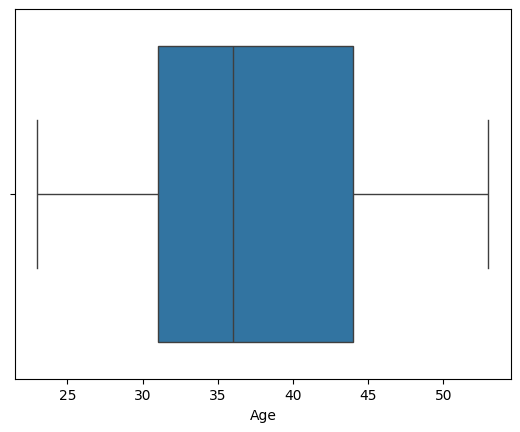

In [10]:
#Check For Outliers
sns.boxplot(x="Age",data=dataset)
plt.show()

In [11]:
dataset = dataset[dataset["Salary"] > 0]
dataset = dataset[dataset["Salary"] < 200000]

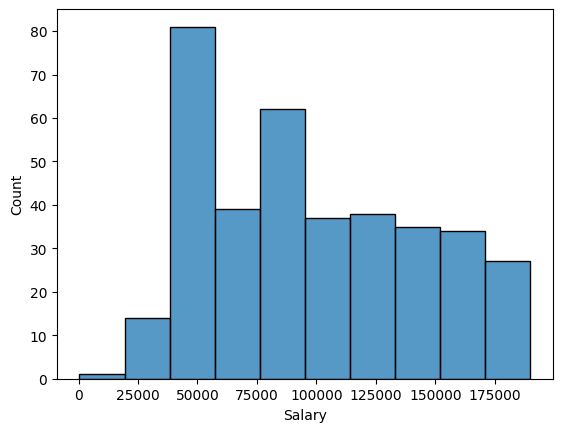

In [12]:
sns.histplot(data=dataset, x="Salary")
plt.show()

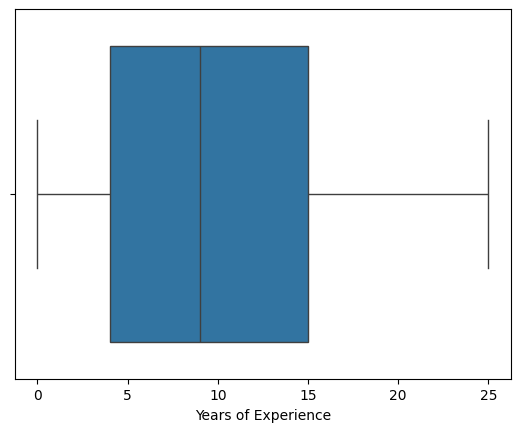

In [13]:
sns.boxplot(x="Years of Experience",data=dataset)
plt.show()

In [14]:
# Check gender distribution
print(dataset['Gender'].value_counts(normalize=True))
# Check salary distribution
print(dataset['Salary'].value_counts(normalize=True))

Gender
Male      0.513587
Female    0.486413
Name: proportion, dtype: float64
Salary
40000.0     0.084239
95000.0     0.059783
50000.0     0.059783
180000.0    0.054348
120000.0    0.054348
90000.0     0.048913
150000.0    0.048913
45000.0     0.048913
60000.0     0.046196
110000.0    0.046196
160000.0    0.046196
170000.0    0.043478
100000.0    0.038043
140000.0    0.038043
130000.0    0.038043
35000.0     0.035326
80000.0     0.032609
55000.0     0.027174
85000.0     0.027174
70000.0     0.024457
65000.0     0.024457
105000.0    0.016304
190000.0    0.010870
75000.0     0.010870
115000.0    0.008152
175000.0    0.005435
135000.0    0.005435
125000.0    0.002717
30000.0     0.002717
185000.0    0.002717
145000.0    0.002717
155000.0    0.002717
350.0       0.002717
Name: proportion, dtype: float64


In [15]:
# Mean salary by gender
print(dataset.groupby('Gender')['Salary'].mean())

# Or view full salary distribution per gender
print(dataset.groupby('Gender')['Salary'].describe())


Gender
Female     97011.173184
Male      100689.682540
Name: Salary, dtype: float64
        count           mean           std      min      25%      50%  \
Gender                                                                  
Female  179.0   97011.173184  45916.141054  35000.0  50000.0  90000.0   
Male    189.0  100689.682540  46667.692500    350.0  60000.0  95000.0   

             75%       max  
Gender                      
Female  140000.0  190000.0  
Male    135000.0  190000.0  


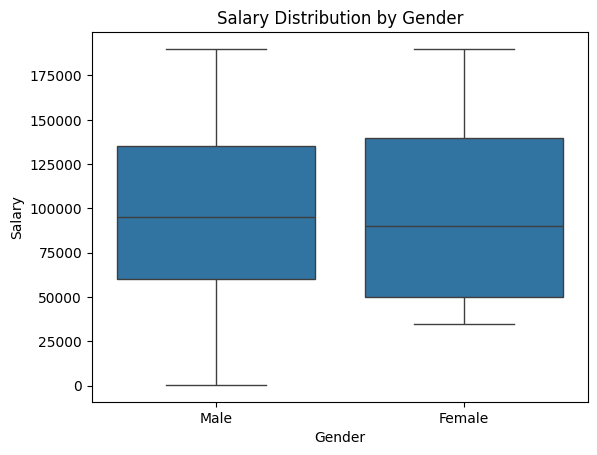

In [16]:
sns.boxplot(x='Gender', y='Salary', data=dataset)
plt.title("Salary Distribution by Gender")
plt.show()


In [17]:
import pandas as pd

# Cross-tab of salary category vs gender
pd.crosstab(dataset['Gender'], dataset['Salary'], normalize='index')


Salary,350.0,30000.0,35000.0,40000.0,45000.0,50000.0,55000.0,60000.0,65000.0,70000.0,...,140000.0,145000.0,150000.0,155000.0,160000.0,170000.0,175000.0,180000.0,185000.0,190000.0
Gender,,,,,,,,,,,,,,,,,,,,,
Female,0.000000,0.000000,0.027933,0.089385,0.067039,0.072626,0.033520,0.027933,0.027933,0.033520,...,0.050279,0.005587,0.061453,0.000000,0.055866,0.011173,0.000000,0.067039,0.005587,0.005587
Male,0.005291,0.005291,0.042328,0.079365,0.031746,0.047619,0.021164,0.063492,0.021164,0.015873,...,0.026455,0.000000,0.037037,0.005291,0.037037,0.074074,0.010582,0.042328,0.000000,0.015873


In [18]:
dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [19]:
dataset.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [20]:
from sklearn.model_selection import train_test_split
X = dataset.drop(["Salary"], axis=1)  # Drop both columns
y = dataset["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Senior Manager,15.0
3,36.0,Female,Bachelor's,Sales Associate,7.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0
...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0
371,43.0,Male,Master's,Director of Operations,19.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error

# Identify columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Model dictionary
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'GradientBoosting': GradientBoostingRegressor()
}

# Loop through models
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.4f}")


LinearRegression - MSE: 254848578.96, R2: 0.8739
RandomForest - MSE: 169113952.70, R2: 0.9163
KNN - MSE: 152986486.49, R2: 0.9243
SVR - MSE: 2031146767.94, R2: -0.0054
GradientBoosting - MSE: 146529724.72, R2: 0.9275


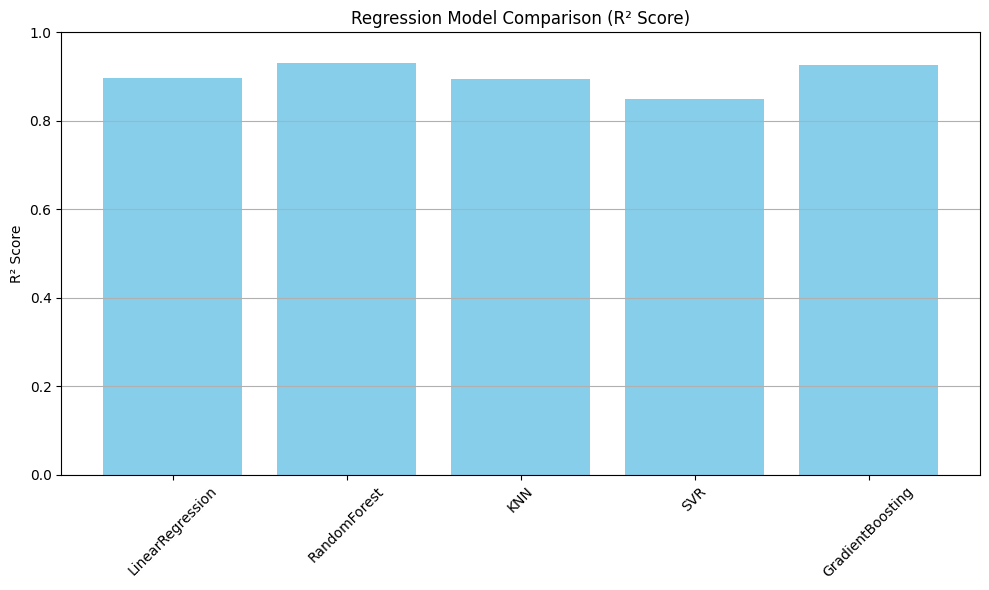

In [23]:
import matplotlib.pyplot as plt

# Assuming `results` is a dictionary with model names as keys and R² scores as values
results = {
    'LinearRegression': 0.8961,
    'RandomForest': 0.9316,
    'KNN': 0.8938,
    'SVR': 0.8501,
    'GradientBoosting': 0.9269
}

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('R² Score')
plt.title('Regression Model Comparison (R² Score)')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # R² scores are usually between 0 and 1
plt.grid(axis='y')
plt.tight_layout()
plt.show()



✅ Best model: GradientBoosting with R² score 0.9279
✅ Saved full pipeline as best_model.pkl


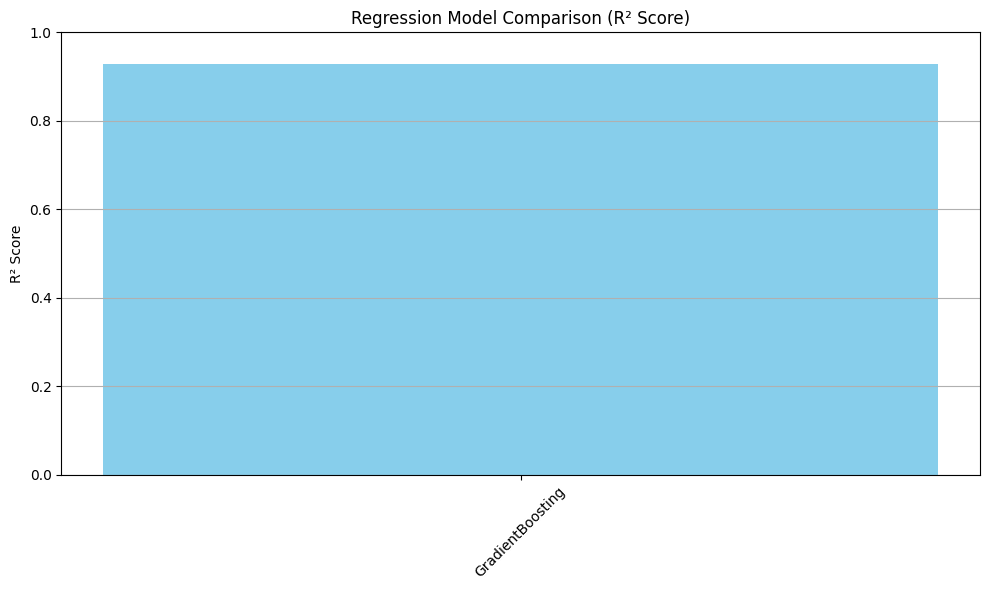

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import joblib


# 🔹 Features and target
X = dataset.drop(["Salary"], axis=1)
y = dataset["Salary"]

# 🔹 Separate numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 🔹 Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# 🔹 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Define models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'GradientBoosting': GradientBoostingRegressor()
}

results = {}
best_pipe = None
best_model_name = None
best_r2 = -999
    
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
    
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
results[name] = r2
    
if r2 > best_r2:
    best_r2 = r2
    best_pipe = pipe
    best_model_name = name
   

# 🔹 Save best pipeline
joblib.dump(best_pipe, "best_model.pkl")
print(f"\n✅ Best model: {best_model_name} with R² score {best_r2:.4f}")
print("✅ Saved full pipeline as best_model.pkl")

# 🔹 Visualization
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('R² Score')
plt.title('Regression Model Comparison (R² Score)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Encode job title
job_encoder = LabelEncoder()
job_encoded_data = job_encoder.fit_transform(dataset["Job Title"])

gender_encoder = LabelEncoder()
gender_encoded_data = gender_encoder.fit_transform(dataset["Gender"])

education_encoder = LabelEncoder()
education_encoded_data = education_encoder.fit_transform(dataset["Education Level"])


In [26]:
%%writefile salary_app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from datetime import datetime
from streamlit_modal import Modal



# Load model
model = joblib.load("best_model.pkl")

# For dropdowns excess keys()
job_title = [
   'Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
       'Director of Marketing', 'Help Desk Analyst',
       'Customer Service Manager', 'Business Intelligence Analyst',
       'Event Coordinator', 'VP of Finance', 'Graphic Designer',
       'UX Researcher', 'Social Media Manager', 'Director of Operations',
       'Senior Data Scientist', 'Junior Accountant',
       'Digital Marketing Manager', 'IT Manager',
       'Customer Service Representative', 'Business Development Manager',
       'Senior Financial Analyst', 'Web Developer', 'Research Director',
       'Technical Support Specialist', 'Creative Director',
       'Senior Software Engineer', 'Human Resources Director',
       'Content Marketing Manager', 'Technical Recruiter',
       'Sales Representative', 'Chief Technology Officer',
       'Junior Designer', 'Financial Advisor', 'Junior Account Manager',
       'Senior Project Manager', 'Principal Scientist',
       'Supply Chain Manager', 'Senior Marketing Manager',
       'Training Specialist', 'Research Scientist',
       'Junior Software Developer', 'Public Relations Manager',
       'Operations Analyst', 'Product Marketing Manager',
       'Senior HR Manager', 'Junior Web Developer',
       'Senior Project Coordinator', 'Chief Data Officer',
       'Digital Content Producer', 'IT Support Specialist',
       'Senior Marketing Analyst', 'Customer Success Manager',
       'Senior Graphic Designer', 'Software Project Manager',
       'Supply Chain Analyst', 'Senior Business Analyst',
       'Junior Marketing Analyst', 'Office Manager', 'Principal Engineer',
       'Junior HR Generalist', 'Senior Product Manager',
       'Junior Operations Analyst', 'Senior HR Generalist',
       'Sales Operations Manager', 'Senior Software Developer',
       'Junior Web Designer', 'Senior Training Specialist',
       'Senior Research Scientist', 'Junior Sales Representative',
       'Junior Marketing Manager', 'Junior Data Analyst',
       'Senior Product Marketing Manager', 'Junior Business Analyst',
       'Senior Sales Manager', 'Junior Marketing Specialist',
       'Junior Project Manager', 'Senior Accountant', 'Director of Sales',
       'Junior Recruiter', 'Senior Business Development Manager',
       'Senior Product Designer', 'Junior Customer Support Specialist',
       'Senior IT Support Specialist', 'Junior Financial Analyst',
       'Senior Operations Manager', 'Director of Human Resources',
       'Junior Software Engineer', 'Senior Sales Representative',
       'Director of Product Management', 'Junior Copywriter',
       'Senior Marketing Coordinator', 'Senior Human Resources Manager',
       'Junior Business Development Associate', 'Senior Account Manager',
       'Senior Researcher', 'Junior HR Coordinator',
       'Director of Finance', 'Junior Marketing Coordinator',
       'Junior Data Scientist', 'Senior Operations Analyst',
       'Senior Human Resources Coordinator', 'Senior UX Designer',
       'Junior Product Manager', 'Senior Marketing Specialist',
       'Senior IT Project Manager', 'Senior Quality Assurance Analyst',
       'Director of Sales and Marketing', 'Senior Account Executive',
       'Director of Business Development', 'Junior Social Media Manager',
       'Senior Human Resources Specialist', 'Senior Data Analyst',
       'Director of Human Capital', 'Junior Advertising Coordinator',
       'Junior UX Designer', 'Senior Marketing Director',
       'Senior IT Consultant', 'Senior Financial Advisor',
       'Junior Business Operations Analyst',
       'Junior Social Media Specialist',
       'Senior Product Development Manager', 'Junior Operations Manager',
       'Senior Software Architect', 'Junior Research Scientist',
       'Senior Financial Manager', 'Senior HR Specialist',
       'Senior Data Engineer', 'Junior Operations Coordinator',
       'Director of HR', 'Senior Operations Coordinator',
       'Junior Financial Advisor', 'Director of Engineering'
]
education = ["High School", "Associate's Degree", "Bachelor's Degree", "Master's Degree", "Doctorate", "Other"]
gender = ["Male", "Female"]

# Minimum age logic
min_age_map = {
    "Bachelor's Degree": 22,
    "Master's Degree": 24,
    "Doctorate": 30,
    "High School":18
}

def is_valid_combination(age, experience, education):
    min_required_age = min_age_map.get(education, 18)
    return age >= min_required_age and age >= (experience + min_required_age - 2)

# --------------------------
# Streamlit UI
# --------------------------
st.set_page_config(page_title="Salary Predictor", page_icon="💼")

st.markdown("""
    <style>
    body {
        background-color: #fdf0d5;
        color: #432818;
    }
    .reportview-container .main .block-container {
        color: #432818;
    }
    .stAlert {
        background-color: #c1121f !important;
        color: white !important;
    }
    .stSuccess {
        background-color: #003049 !important;
        color: #fdf0d5 !important;
        font-weight: bold;
        font-size: 18px;
        padding: 1rem;
        border-radius: 10px;
    }
    .stButton > button {
        background-color: #FFEDDF;
        color: #000000;
        border: 1px solid #ccc;
        border-radius: 8px;
        padding: 0.5em 1.2em;
        font-weight: bold;
        transition: background-color 0.3s ease;
    }
    .stButton > button:hover {
        background-color: #f2dac4;
        cursor: pointer;
    }
    .custom-download-button {
        background-color: #283618;
        color: #fefae0;
        padding: 0.6em 1.2em;
        font-size: 16px;
        font-weight: bold;
        border: none;
        border-radius: 10px;
        transition: 0.3s ease;
    }
    .custom-download-button:hover {
        background-color: #2a9d8f;
        color: #fdfdfd;
        cursor: pointer;
    }
    </style>
""", unsafe_allow_html=True)

# Title
st.title("💼 Smart Salary Predictor")
st.write("Fill up the details and get your expected salary")

# Inputs
age = st.number_input("Age", min_value=5, max_value=100, step=1)

with st.expander("💼 Job Details", expanded=True):
    job_title = st.selectbox(" Select Job Title",sorted(job_title))
    experience = st.slider("Years of Experience", 0, 50, 2)

with st.expander("🎓 Education Details", expanded=True):
    education = st.selectbox("Education Level", education)

gender = st.selectbox("Gender", gender)

currency_option = st.radio("Choose your preferred currency:", ["INR (₹)", "USD ($)"])

# Prediction
if st.button("🔮 Predict Salary"):
    if not is_valid_combination(age, experience, education):
        st.error("⚠️ No logical match between age, experience, and education. Please check your inputs.")
    else:
        # Input data for prediction
        input_data = pd.DataFrame([{
            'Age': age,
            'Years of Experience': experience,
            'Education Level': education,
            'Job Title': job_title,
            'Gender': gender
        }])

        # Make prediction
        salary_pred = model.predict(input_data)[0]
        salary_display = salary_pred if currency_option == "INR (₹)" else salary_pred / 83.0

        # Show final prediction 
        if currency_option == "USD ($)":
            st.success(f"💵 Estimated Salary: ${salary_display:,.2f}")
            st.toast("Salary Predicted Successfully!", icon="🎉")
        else:
            st.success(f"💵 Estimated Salary: ₹{salary_display:,.2f}")
            st.toast("Salary Predicted Successfully!", icon="🎉")

        # 📊 Salary Range Chart
        st.markdown("### 📈 Salary Range Visualization")
        min_range = salary_pred * 0.85
        max_range = salary_pred * 1.15
        salaries = [min_range, salary_pred, max_range]
        labels = ['Low Estimate', 'Predicted', 'High Estimate']
        colors = ['#FFDDE2', '#EFD6D2', '#6F5E76']

        fig, ax = plt.subplots()
        ax.bar(labels, salaries, color=colors)
        ax.set_ylabel("Salary")
        st.pyplot(fig)

         # --- Report Section ---

        model_accuracy = 92.56  # Manually written
        def center_text_block(text, width=80):
            return "\n".join(line.center(width) for line in text.strip().split("\n"))

        header = f"""
            Salary Predictor Report
            --------------------------------------------------------------------------------
            📅 Date: {datetime.now().strftime("%Y-%m-%d")}
            """
    
        user_details_table = f"""
            👤 User Details:
            +------------+----------------------+
            | Field      | Value                |
            +------------+----------------------+
            | Age        | {str(age):<21}|
            | Gender     | {gender:<21}|
            | Education  | {education:<21}|
            | Job Title  | {job_title:<21}|
            | Experience | {(str(experience) + ' years'):<21}|
            +------------+----------------------+
        """
        currency_symbol = "₹" if currency_option == "INR (₹)" else "$"
        salary_prediction_table = f"""
        💼 Salary Prediction:
        +---------------------+-------------------+-------------------+
        | Estimated Salary    | Minimum Salary    | Maximum Salary    |
        +---------------------+-------------------+-------------------+
        |{currency_symbol} {salary_display:>19,.2f}| {currency_symbol} {min_range:>15,.2f}|{currency_symbol} {max_range:>15,.2f}|
        +---------------------+-------------------+-------------------+
        """

        accuracy_section = f"""
        📊 Model Performance:
        Accuracy of the model: {model_accuracy:.2f}%
        """

        footer = """
        🙏 Thank you for using the Salary Predictor!

        📌 Note: Salary predictions are based on machine learning models trained on historical data.
        Actual values may vary depending on location, company, and market trends.
        """

        full_report = "\n\n".join([
            center_text_block(header),
            center_text_block(user_details_table),
            center_text_block(salary_prediction_table),
            center_text_block(accuracy_section),
            "-" * 100,
            center_text_block(footer)
        ])

        if st.button("💾 Save"):
            with open("salary_report.txt", "w", encoding="utf-8") as file:
                file.write(full_report)

        st.subheader("📄 Download Salary Report")
        if st.download_button(
            label="📅 Download",
            data=full_report,
            file_name="salary_report.txt",
            mime="text/plain"
        ):
            st.toast("Download Successful!", icon="🎉")

# --- website Footer ---
st.markdown("---")
st.markdown("""
<style>
.feedback-link {
    color: #1a73e8;
    font-weight: 400;
    text-decoration: none;
    font-style: italic;
    transition: color 0.3s ease, text-decoration 0.3s ease, font-size 0.3s ease;
}

.feedback-link:hover {
    color: #90caf9; 
    text-decoration: underline;
    text-shadow: 0px 0px 4px #90caf9;
    font-size: 17px;
}

/* Icon hover styles */
.icon-hover {
    transition: transform 0.3s ease, filter 0.3s ease;
}

.icon-hover:hover {
    transform: scale(1.2);
    filter: brightness(1.3);
}
</style>

<p align="center" style="font-size: 16px; color: white;">
    🙏 Thank you for using <strong>Smart Salary Predictor</strong><br><br>
    <span style="font-weight: 300; color: #cccccc;">
        📝 <a href="https://docs.google.com/forms/d/e/1FAIpQLSfztUsU-0QDf98F2rDjkK7mN7BbJYZpc-CNWvBwQrc94ziyNg/viewform?usp=header" 
              target="_blank" 
              class="feedback-link">
            Click here
        </a> to give your valuable feedback
    </span>
</p>

<div style="display: flex; justify-content: center; align-items: center; gap: 24px; margin-top: 10px;">
    <a href="https://github.com/Prachikdhunde04" target="_blank">
        <img class="icon-hover" src="https://cdn-icons-png.flaticon.com/512/25/25231.png" width="30" />
    </a>
    <a href="https://www.linkedin.com/in/prachi-dhunde-408b2825a/" target="_blank">
        <img class="icon-hover" src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" />
    </a>
    <a href="mailto:prachidhunde@gmail.com">
        <img class="icon-hover" src="https://cdn-icons-png.flaticon.com/512/732/732200.png" width="30" />
    </a>
</div>

<p align="center" style="margin-top: 12px; color: #888;">© 2025 Prachi Dhunde. All rights reserved.</p>
""", unsafe_allow_html=True)


Overwriting salary_app.py


In [ ]:
!streamlit run salary_app.py